In [1]:
import torch
from transformers import ChineseCLIPProcessor, ChineseCLIPVisionModel
from PIL import Image
import requests

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
version = "OFA-Sys/chinese-clip-vit-base-patch16"
url = "https://clip-cn-beijing.oss-cn-beijing.aliyuncs.com/pokemon.jpeg"

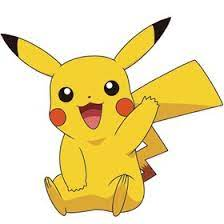

In [4]:
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
image

# ChineseCLIPProcessor

In [5]:
processor: ChineseCLIPProcessor = ChineseCLIPProcessor.from_pretrained(version)
processor

ChineseCLIPProcessor:
- image_processor: ChineseCLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ChineseCLIPFeatureExtractor",
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "ChineseCLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

- tokenizer: BertTokenizerFast(name_or_path='OFA-Sys/chinese-clip-vit-base-patch16', vocab_size=21128, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

## processor

In [6]:
inputs = processor(
    images = image,             # 可以为列表或单个string
    return_tensors = "pt",      # 返回数据格式 np pt tf jax
).to(device, torch.float16)
inputs

{'pixel_values': tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          ...,
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],

         [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          ...,
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749]],

         [[2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459

In [12]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

# ChineseCLIPVisionModel

The vision model from CHINESE_CLIP without any head or projection on top.

In [7]:
vision_model: ChineseCLIPVisionModel = ChineseCLIPVisionModel.from_pretrained(version, torch_dtype=torch.float16).to(device)
vision_model

ChineseCLIPVisionModel(
  (vision_model): ChineseCLIPVisionTransformer(
    (embeddings): ChineseCLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
      (position_embedding): Embedding(197, 768)
    )
    (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (encoder): ChineseCLIPVisionEncoder(
      (layers): ModuleList(
        (0-11): 12 x ChineseCLIPVisionLayer(
          (self_attn): ChineseCLIPVisionAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): ChineseCLIPVisionMLP(
            (activation_fn): QuickGELUActivation()
            (f

In [8]:
vision_model.eval()
with torch.inference_mode():
    outputs = vision_model(**inputs)
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.0376, -0.0453,  0.5050,  ..., -0.1332,  0.5287, -0.4276],
         [-0.3517, -0.4554,  0.5044,  ...,  0.1001,  0.4396, -0.6835],
         [-0.1797, -0.6498,  0.6396,  ...,  0.0494,  0.7740, -1.0412],
         ...,
         [-0.6442,  0.2438,  1.0173,  ..., -0.5388,  0.5552, -0.6831],
         [-0.2770, -0.4830,  0.4902,  ...,  0.1502,  0.3574, -0.7360],
         [-0.1887, -0.4412,  0.4910,  ..., -0.1395,  0.5428, -0.8705]]],
       device='cuda:0'), pooler_output=tensor([[ 8.3868e-01, -3.4476e-01,  1.2409e+00,  6.1474e-01,  2.4583e+00,
         -4.5250e-01,  5.6830e-01,  9.2936e-02,  3.4313e-01,  1.0611e+00,
          8.0018e-01,  9.9642e-01,  2.0973e-03,  3.0247e-01, -9.0642e-01,
         -3.2877e-01,  2.9634e-02, -1.0087e+00,  6.6593e-02,  4.7794e-01,
          1.9758e+00,  4.6201e-01,  1.0701e-01,  3.7549e-01,  8.3065e-02,
         -1.8040e+00,  3.7178e-01, -4.9504e-02,  3.6282e-01,  5.7304e-03,
         -1.2075e+00,  8.0939e

In [9]:
outputs.last_hidden_state.shape

torch.Size([1, 197, 768])

In [10]:
outputs.pooler_output.shape

torch.Size([1, 768])

In [11]:
outputs.hidden_states

In [12]:
outputs.attentions